In [2]:
### ANALYSIS FOR VARIABLE 1: Property Type 

In [3]:
%matplotlib inline

In [4]:
## STEP 1: SETTING UP

In [5]:
# Import Dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [6]:
# Create a path to the file.
Melb_Airbnb = Path("Outputs/Melbourne_refined_listings_cleaned.csv")                                                                                                  

# Read and display the CSV with Pandas
Melb_Airbnb_df = pd.read_csv(Melb_Airbnb)
Melb_Airbnb_df.head() 

,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,572431386115618941,446636199,2022-02-24,"St Kilda, Australia",within an hour,95%,99%,f,t,t,...,4.0,4.6,4.43,4.37,3.97,8,0,4,4,1.21
1,727686708237430703,382295537,2020-12-30,"Melbourne, Australia",within a few hours,89%,57%,f,t,t,...,4.2,4.2,4.20,4.20,4.20,3,0,3,0,0.81
2,1051913801382467131,22860147,2014-10-22,"Melbourne, Australia",within an hour,100%,99%,f,t,t,...,5.0,5.0,5.00,4.50,4.00,105,105,0,0,0.98
3,1106234039745058155,16365362,2014-06-04,"Melbourne, Australia",within an hour,100%,100%,f,t,t,...,5.0,5.0,5.00,5.00,5.00,1,0,1,0,1.00
4,1053974246558615906,551937839,2023-12-21,"Point Cook, Australia",within an hour,97%,94%,f,t,t,...,4.0,3.5,4.00,4.00,5.00,7,7,0,0,2.00


In [7]:
## STEP 2: DATA CLEANING & PREPARATION

In [8]:
# Check for missing values
print(Melb_Airbnb_df.isnull().sum())

# Drop rows with missing values in 'price' & 'property_type' columns
Melb_Airbnb_df = Melb_Airbnb_df.dropna(subset=['price', 'property_type'])

# Convert price to numeric if it's not already 
Melb_Airbnb_df['price'] = pd.to_numeric(Melb_Airbnb_df['price'], errors='coerce') #errors='coerce' to convert invalid values to NaN, ensuring clean numeric data and better data handling

# Check the data types
print(Melb_Airbnb_df.dtypes)

id                                              0
host_id                                         0
host_since                                      0
host_location                                   0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bathrooms_text                                  0
bedrooms                                        0
beds                                            0


In [9]:
# Convert price to numeric 
Melb_Airbnb_df['price'] = pd.to_numeric(Melb_Airbnb_df['price'], errors='coerce') #errors='coerce' to convert invalid values to NaN, ensuring clean numeric data and better data handling

In [10]:
# Inspecting the first few rows of the 'price' column
print(Melb_Airbnb_df['price'].head(20))

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
Name: price, dtype: float64


In [11]:
# Print the unique values in the 'price' column to diagnose the issue
print(Melb_Airbnb_df['price'].unique())

[nan]


In [12]:
# If the 'price' column contains symbols like $, remove them
Melb_Airbnb_df['price'] = Melb_Airbnb_df['price'].replace('[\$,]', '', regex=True)

# Convert 'price' to numeric
Melb_Airbnb_df['price'] = pd.to_numeric(Melb_Airbnb_df['price'], errors='coerce')

# Inspect the first few rows of the 'price' column
print(Melb_Airbnb_df['price'].head(20))

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
Name: price, dtype: float64


In [13]:
# Define the correct path to the CSV file
file_path = 'Outputs/Melbourne_refined_listings_cleaned.csv'

# Read the CSV file without inferring data types
Melb_Airbnb_df = pd.read_csv(file_path, dtype=str)

# Print the first few rows of the 'price' column to inspect its raw values
print(Melb_Airbnb_df['price'].head(20))

0     $123.00
1      $50.00
2     $166.00
3     $120.00
4     $202.00
5      $80.00
6     $579.00
7      $75.00
8     $104.00
9      $55.00
10    $171.00
11    $175.00
12    $150.00
13     $50.00
14    $235.00
15    $284.00
16    $968.00
17    $600.00
18    $220.00
19    $231.00
Name: price, dtype: object


In [14]:
# Ensure the 'price' column is read as a string and clean the values
Melb_Airbnb_df['price'] = Melb_Airbnb_df['price'].astype(str).str.strip().str.replace('$', '').str.replace(',', '')

# Convert the 'price' column to numeric
Melb_Airbnb_df['price'] = pd.to_numeric(Melb_Airbnb_df['price'], errors='coerce')

# Verify the conversion by inspecting the first few rows of the 'price' column
print(Melb_Airbnb_df['price'].head(20))

0     123.0
1      50.0
2     166.0
3     120.0
4     202.0
5      80.0
6     579.0
7      75.0
8     104.0
9      55.0
10    171.0
11    175.0
12    150.0
13     50.0
14    235.0
15    284.0
16    968.0
17    600.0
18    220.0
19    231.0
Name: price, dtype: float64


In [15]:
## STEP 3: EXPLORATORY DATA ANALYSIS

In [16]:
Melb_Airbnb_df['property_type'].nunique()

70

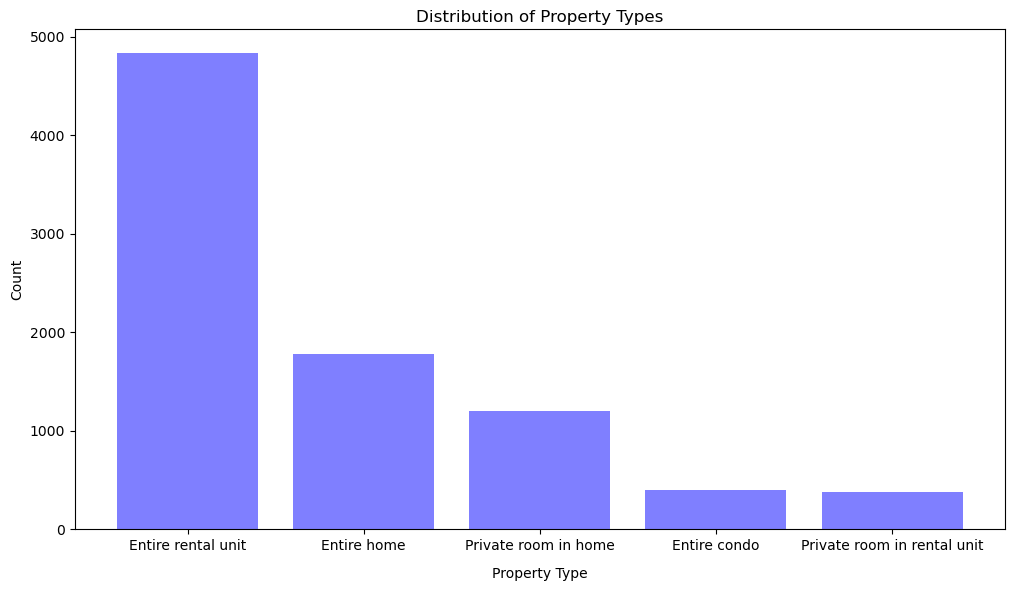

In [17]:
# Define x and y values for top 5 property types
property_counts = Melb_Airbnb_df['property_type'].value_counts().nlargest(5)
x_axis = property_counts.index
y_axis = property_counts.values


# Distribution of property types via Bar graph
plt.figure(figsize=(12, 6.5))
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align='center')
plt.title('Distribution of Property Types', pad=5)
plt.xlabel('Property Type', labelpad=10)
plt.ylabel('Count')

  #tick locations
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, rotation=0)

plt.show()

C:\Users\rheak\AppData\Local\Temp\ipykernel_20304\3816874679.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_data = top_5_property_types.groupby('property_type').apply(remove_outliers, 'price').reset_index(drop=True)


<Figure size 1200x800 with 0 Axes>

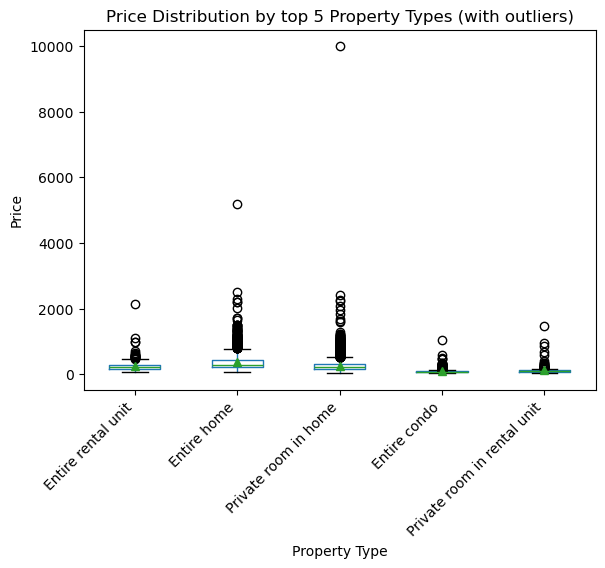

<Figure size 1200x800 with 0 Axes>

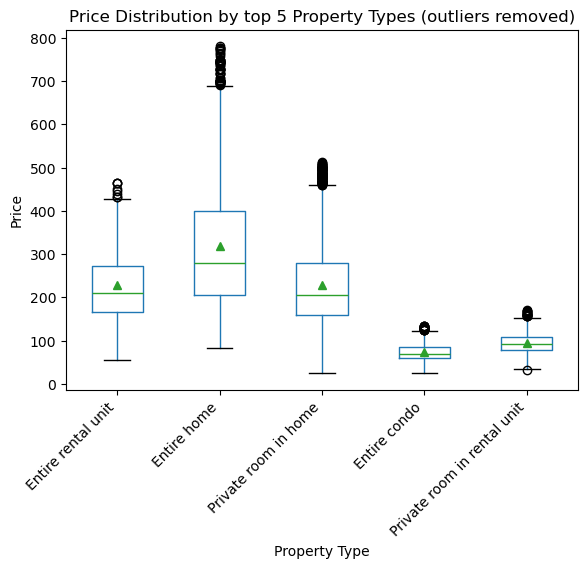

In [18]:
# If the 'price' column contains symbols like $, remove them
Melb_Airbnb_df['price'] = Melb_Airbnb_df['price'].replace('[\$,]', '', regex=True)

# Convert 'price' to numeric
Melb_Airbnb_df['price'] = pd.to_numeric(Melb_Airbnb_df['price'], errors='coerce')


## Boxplot of prices by top 5 property types (WITH OUTLIERS): 

# Filter the DataFrame to only include the top 5 property types
top_5_property_types = Melb_Airbnb_df[Melb_Airbnb_df['property_type'].isin(x_axis)]  


# Boxplot of prices by top 5 property types without outliers
plt.figure(figsize=(12, 8))
top_5_property_types.boxplot(column='price', by='property_type', grid=False, showmeans=True)
plt.title('Price Distribution by top 5 Property Types (with outliers)')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.suptitle('')  # Suppress the default title to clean up the plot

# Ensure the labels are correctly aligned with the plots
plt.xticks(range(1, len(x_axis) + 1), x_axis, rotation=45, ha='right')


## Boxplot of prices by top 5 property types (WITHOUT OUTLIERS): 

# Filter out outliers for each property type
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]

# filtered_data = top_5_property_types.groupby('property_type', group_keys=False).apply(remove_outliers, 'price').reset_index(drop=True)


filtered_data = top_5_property_types.groupby('property_type').apply(remove_outliers, 'price').reset_index(drop=True)

plt.figure(figsize=(12, 8))
filtered_data.boxplot(column='price', by='property_type', grid=False, showmeans=True)
plt.title('Price Distribution by top 5 Property Types (outliers removed)')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.suptitle('')  # Suppress the default title to clean up the plot

# Ensure the labels are correctly aligned with the plots
plt.xticks(range(1, len(x_axis) + 1), x_axis, rotation=45, ha='right')


plt.show()   

In [19]:
## STEP 4: HYPOTHESIS TESTING USING ANOVA 

In [20]:
# Extract prices for the top 5 property types
top_5_property_types = Melb_Airbnb_df['property_type'].value_counts().nlargest(5).index
prices_by_property_type = [Melb_Airbnb_df[Melb_Airbnb_df['property_type'] == property_type]['price'] for property_type in top_5_property_types]

# Perform ANOVA
f_stat, p_value = stats.f_oneway(*prices_by_property_type)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in prices across different property types.")
else:
    print("There is no significant difference in prices across different property types.")


F-statistic: 367.28832317468897
P-value: 1.9034920018749521e-292
There is a significant difference in prices across different property types.


## HYPOTHESIS: Entire homes/apartments are priced higher than private or shared rooms

# NULL HYPOTHESIS (𝐻0): 
There is no significant difference in the average prices between different property types (entire homes, private rooms, shared rooms, etc.).


# ALTERNATE HYPOTHESIS (𝐻1):
There is a significant difference in the average prices between different property types.


## INTERPRETATION OF ANOVA RESULTS:

Since the p-value < 0.05, we reject the null hypothesis, in favour of the alternate hypothesis. This suggests that there is a significant difference in the prices across different property types.

Therefore, this would support the hypothesis that entire homes/apartments are priced higher than private or shared rooms

In [ ]:
## STEP 5: VISUALISE THE RESULTS 

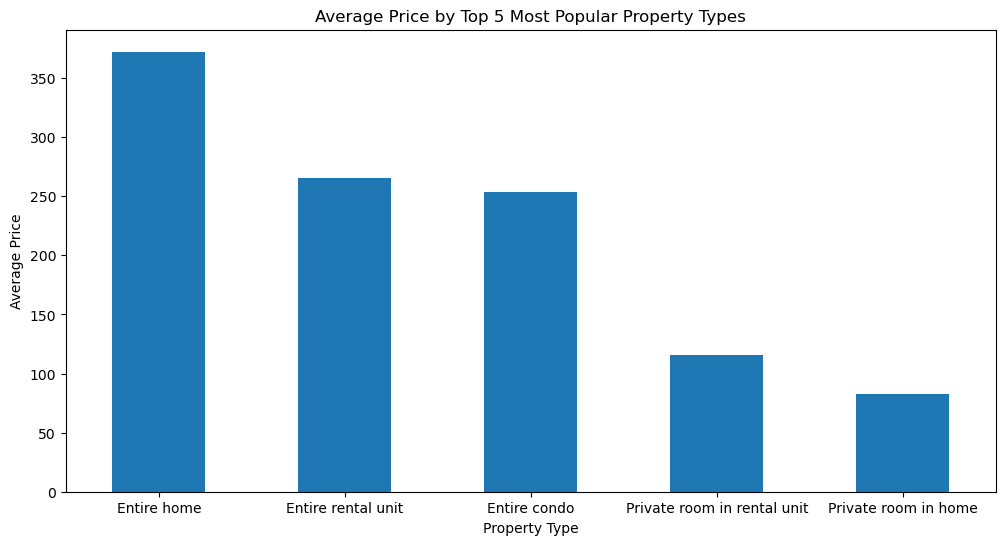

In [21]:
# Get the top 5 most popular property types
top_5_property_types = Melb_Airbnb_df['property_type'].value_counts().nlargest(5).index

# Calculate average price for each of the top 5 property types
average_prices = Melb_Airbnb_df[Melb_Airbnb_df['property_type'].isin(top_5_property_types)].groupby('property_type')['price'].mean().sort_values(ascending=False)

# Bar chart of average prices by top 5 most popular property types
plt.figure(figsize=(12, 6))
average_prices.plot(kind='bar')
plt.title('Average Price by Top 5 Most Popular Property Types')
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

In [274]:
### ANALYSIS FOR VARIABLE 2: Amenities

In [275]:
## STEP 6: EXPLORATORY DATA ANALYSIS & HYPOTHESIS TESTING

T-statistic: 4.351066495860205
P-value: 1.367612706353268e-05


<Figure size 800x600 with 0 Axes>

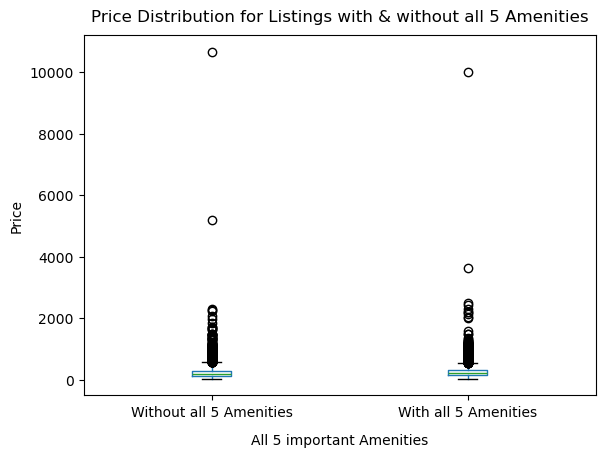

<Figure size 800x600 with 0 Axes>

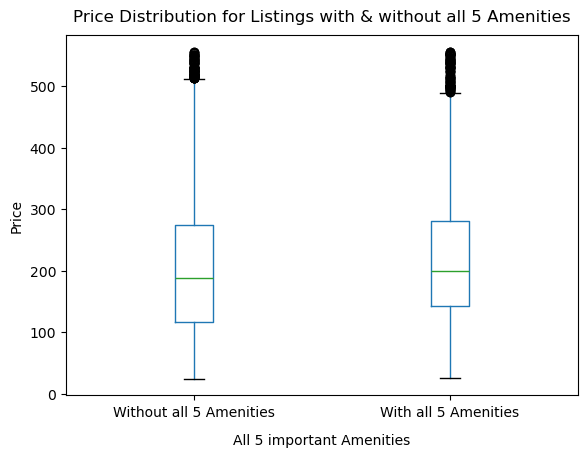

In [22]:
# Select 5 important amenities
important_amenities = ['Wifi', 'Kitchen', 'Essentials', 'Air conditioning', 'Heating']

# Create columns for the selected amenities
for amenity in important_amenities:
 Melb_Airbnb_df[amenity] = Melb_Airbnb_df['amenities'].str.contains(amenity, na=False)

# Determine if a listing has all 5 important amenities
Melb_Airbnb_df['All_Important_Amenities'] = Melb_Airbnb_df[important_amenities].all(axis=1)

# Prepare data for analysis
prices_with_all_amenities = Melb_Airbnb_df[Melb_Airbnb_df['All_Important_Amenities'] == True]['price']
prices_without_all_amenities = Melb_Airbnb_df[Melb_Airbnb_df['All_Important_Amenities'] == False]['price']

# Perform t-test
t_stat, p_value = stats.ttest_ind(prices_with_all_amenities.dropna(), prices_without_all_amenities.dropna())

# Print t-test results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

## Boxplot of prices for listings with and without all 5 important amenities (WITH OUTLIERS) 

plt.figure(figsize=(8, 6))
Melb_Airbnb_df.boxplot(column='price', by='All_Important_Amenities', grid=False)
plt.title('Price Distribution for Listings with & without all 5 Amenities',  pad=10)
plt.xlabel('All 5 important Amenities', labelpad=10)  # To adjust and separate the X-label
plt.ylabel('Price')
plt.suptitle('')  # Suppress the default title to clean up the plot
plt.xticks([1, 2], ['Without all 5 Amenities', 'With all 5 Amenities'])


## Boxplot of prices for listings with and without all 5 important amenities (WITHOUT OUTLIERS) 

# Filter out outliers 
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]

filtered_data = remove_outliers(Melb_Airbnb_df, 'price')


# Boxplot of prices for listings with and without all 5 important amenities (WITH OUTLIERS) 
plt.figure(figsize=(8, 6))
filtered_data.boxplot(column='price', by='All_Important_Amenities', grid=False)
plt.title('Price Distribution for Listings with & without all 5 Amenities',  pad=10)
plt.xlabel('All 5 important Amenities', labelpad=10)  # To adjust and separate the X-label
plt.ylabel('Price')
plt.suptitle('')  # Suppress the default title to clean up the plot
plt.xticks([1, 2], ['Without all 5 Amenities', 'With all 5 Amenities'])
plt.show()

## HYPOTHESIS: 

# Null Hypothesis (H0): 
There is no significant difference in the prices of listings with all 5 important amenities and those without all 5 important amenities.

# Alternative Hypothesis (H1): 
There is a significant difference in the prices of listings with all 5 important amenities and those without all 5 important amenities.

# ANOVA Test Results
F-statistic: 18.93
P-value: 1.37e-05

# Interpretation
Since the P-value is less than 0.05, we reject the null hypothesis and coclude that there is a difference in the prices of listings with all 5 important amenities compared to those without all 5 important amenities.

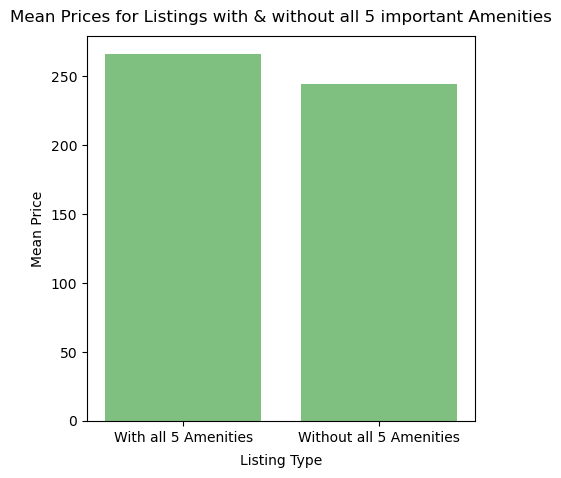

In [23]:
# Visualize the mean prices for listings with and without all 5 important amenities
mean_price_with_all = prices_with_all_amenities.mean()
mean_price_without_all = prices_without_all_amenities.mean()

plt.figure(figsize=(5, 5))
plt.bar(['With all 5 Amenities', 'Without all 5 Amenities'], [mean_price_with_all, mean_price_without_all], color='g', alpha=0.5)
plt.title('Mean Prices for Listings with & without all 5 important Amenities', pad=10) # 'pad' creates distance between title and graph
plt.xlabel('Listing Type', labelpad=7) # 'labelpad' create distance between x-label and x-ticks
plt.ylabel('Mean Price')
plt.show()

# CONCLUSION
Listings that have all the 5 important amenities (Wi-fi, Kitchen, Essentials, Air conditioning and Heating), tend to have different (generally higher) prices compared to those that do not have all 5 important amenities.